In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
%store -r student_courses
%store -r student_majors
%store -r stem_paths
%store -r jacobs
%store -r jacobs_ethnicities
%store -r bcdi
%store -r waivers
%store -r beeps

In [7]:
import matplotlib.colors as mcolors
color_list = ['#672044', '#8B3058', '#AD466C', '#CC607D', '#E38191', '#F4A3A8', '#FFC6C4']
jacobs_colors = [mcolors.to_rgb(x) for x in color_list]
jacobs_two = [mcolors.to_rgb('#8B3058'), mcolors.to_rgb('#F4A3A8')]

In [20]:
cleaned_jacobs = jacobs.loc[jacobs['ppsk'] != 'MISSING']
cleaned_jacobs['ppsk'] = cleaned_jacobs.loc[:, 'ppsk'].astype(int)
ethnicities = cleaned_jacobs.merge(stem_paths[['ppsk', 'ethnic.l1', 'gender']], on='ppsk').drop_duplicates(subset='ppsk').rename(columns={'ethnic.l1': 'Ethnicity', 'gender': 'Gender'})
ethnicities

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,Ethnicity,Gender
0,781707,2015,Fall,N,N,Y,Asian/Pacific Islander,Male
2,895798,2015,Fall,N,N,Y,White/Other,Male
7,857674,2015,Fall,N,N,Y,Asian/Pacific Islander,Female
8,856881,2015,Fall,N,Y,Y,International,Male
9,946962,2015,Fall,N,Y,Y,White/Other,Male
...,...,...,...,...,...,...,...,...
9018,2734942,2020,Fall,N,N,Y,White/Other,Female
9019,2736241,2020,Fall,N,Y,N,Underrepresented Minority,Female
9020,2738497,2020,Fall,N,Y,N,International,Male
9021,2743294,2020,Fall,N,Y,N,Asian/Pacific Islander,Male


In [21]:
demographics = student_courses[['ppsk']].merge(stem_paths[['ppsk', 'ethnic.l1', 'gender']], on='ppsk', how='inner').drop_duplicates().rename(columns={'ethnic.l1': 'Ethnicity', 'gender': 'Gender'})
urms = demographics[demographics['Ethnicity'] == 'Underrepresented Minority']
urms

,ppsk,Ethnicity,Gender
1630,787652,Underrepresented Minority,Male
1735,791882,Underrepresented Minority,Female
2169,813809,Underrepresented Minority,Male
2811,609891,Underrepresented Minority,Male
2997,656505,Underrepresented Minority,Female
...,...,...,...
3761375,2768138,Underrepresented Minority,Female
3761396,2769675,Underrepresented Minority,Male
3761586,1487118,Underrepresented Minority,Female
3761774,2428229,Underrepresented Minority,Male


In [22]:
test = pd.DataFrame(index = ['Other Ethnicities', 'Underrepresented Minorities'], data = 
[demographics.groupby('Ethnicity').count().loc[[True,True,False,True]].sum(),
demographics.groupby('Ethnicity').count().loc['Underrepresented Minority']])

In [23]:
demographics.groupby('Gender').count()

,ppsk,Ethnicity
Gender,,
Decline to State,253,253
Female,41759,41759
Male,38292,38292


In [24]:
ethnicities.groupby('Gender').count()[['ppsk']]

,ppsk
Gender,
Decline to State,54
Female,2268
Male,3123


In [25]:
berk_women_prop = pd.DataFrame(index = ['Men', 'Women'], data = 
[demographics.groupby('Gender').count().loc[[False,False,True]].sum(),
demographics.groupby('Gender').count().loc['Female']])
berk_women_prop

,ppsk,Ethnicity
Men,38292,38292
Women,41759,41759


In [28]:
jacobs_women_prop = pd.DataFrame(index = ['Men', 'Women'], data = 
[ethnicities.groupby('Gender').count()[['ppsk']].loc[[False,False,True]].sum(),
ethnicities.groupby('Gender').count()[['ppsk']].loc['Female']])
jacobs_women_prop['ppsk']

Men      3123
Women    2268
Name: ppsk, dtype: int64

Text(0.5, 1.0, 'URMs at Berkeley')

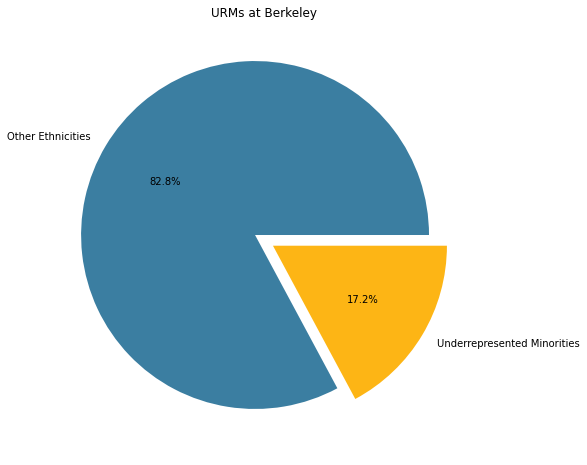

In [32]:
urms_berk = test['ppsk']

blue_gold = [(0.231,0.494,0.631),(0.992,0.709,0.082)]
plt.figure(figsize = (10,8))
plt.pie(urms_berk, labels = urms_berk.index, autopct="%.1f%%", explode=[0.06]*2, pctdistance=0.6, colors=blue_gold)
plt.title("URMs at Berkeley")

[None]

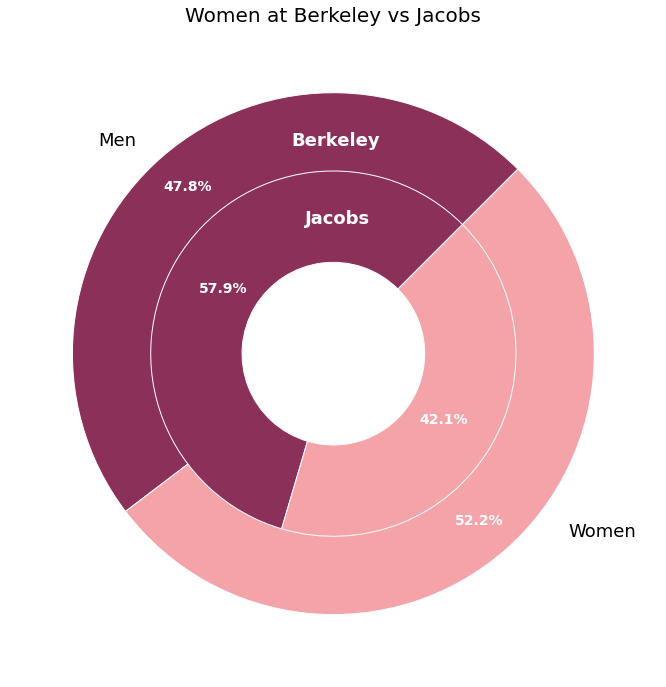

In [83]:
fig, ax = plt.subplots(figsize=(16,12))
font = {'family': 'sans-serif',
        'color':  'white',
        'weight': 'bold',
        'size': 18
        }
size = 0.3
ax.pie(berk_women_prop['ppsk'], radius=1, colors=jacobs_two,
       wedgeprops=dict(width=.35, edgecolor='w',antialiased=True), textprops=dict(size=14,color='white', weight='bold'), labels=urms_berk.index, autopct="%.1f%%", pctdistance=0.85, labeldistance=None, startangle=45)
ax.pie(jacobs_women_prop['ppsk'], radius=1-size, colors=jacobs_two,
       wedgeprops=dict(width=.35, edgecolor='w',antialiased=True),textprops=dict(size=14,color='white',weight='bold'), autopct="%.1f%%", pctdistance=0.7, labeldistance=None, startangle=45)
ax.text(-.11,.5,"Jacobs", fontdict=font)
ax.text(-.16,.8,"Berkeley", fontdict=font)
ax.text(-.9,.8, "Men",fontdict=dict(size=18))
ax.text(.9, -.7,"Women",fontdict=dict(size=18))
ax.set_title('Women at Berkeley vs Jacobs',fontsize=20)
ax.set(aspect="equal")

In [34]:
urms_women = urms.groupby('Gender').count().loc[[False,True,True],:].reindex(['Male','Female']).rename(index={'Male':'Men', 'Female':'Women'})['ppsk']
urms_women

Gender
Men      5915
Women    7854
Name: ppsk, dtype: int64

Text(0.5, 1.0, 'Proportion of URM Women at Berkeley')

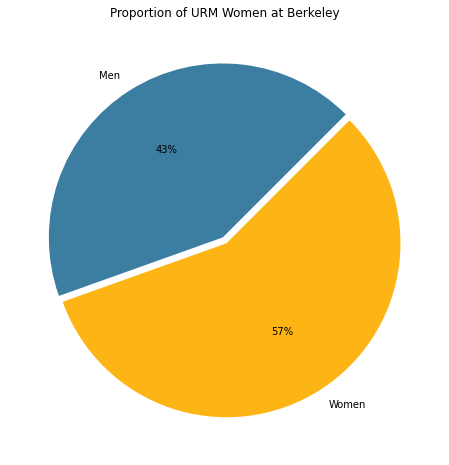

In [35]:
plt.figure(figsize = (10,8))
plt.pie(urms_women, labels=urms_women.index, colors=blue_gold, autopct="%.0f%%", explode=[0.02]*2, pctdistance=0.6, startangle=45)
plt.title("Proportion of URM Women at Berkeley")
#plt.xlabel("7 Declined to State Gender")

In [36]:
# do not run twice without resetting 'urms' variable
urms = urms.merge(student_majors[['ppsk', 'college']], on='ppsk').drop_duplicates()
urms_ls = urms[urms['college'] == 'Clg of Letters & Science']

In [37]:
display(urms)
display(urms_ls)

,ppsk,Ethnicity,Gender,college
0,609891,Underrepresented Minority,Male,Clg of Letters & Science
5,415892,Underrepresented Minority,Female,Clg of Letters & Science
8,456353,Underrepresented Minority,Female,Clg of Letters & Science
16,528730,Underrepresented Minority,Male,Clg of Letters & Science
21,586080,Underrepresented Minority,Female,Clg of Letters & Science
...,...,...,...,...
11015,2760507,Underrepresented Minority,Female,Clg of Letters & Science
11018,2767300,Underrepresented Minority,Male,Clg of Letters & Science
11020,2768138,Underrepresented Minority,Female,Clg of Letters & Science
11023,1487118,Underrepresented Minority,Female,Clg of Letters & Science


,ppsk,Ethnicity,Gender,college
0,609891,Underrepresented Minority,Male,Clg of Letters & Science
5,415892,Underrepresented Minority,Female,Clg of Letters & Science
8,456353,Underrepresented Minority,Female,Clg of Letters & Science
16,528730,Underrepresented Minority,Male,Clg of Letters & Science
21,586080,Underrepresented Minority,Female,Clg of Letters & Science
...,...,...,...,...
11015,2760507,Underrepresented Minority,Female,Clg of Letters & Science
11018,2767300,Underrepresented Minority,Male,Clg of Letters & Science
11020,2768138,Underrepresented Minority,Female,Clg of Letters & Science
11023,1487118,Underrepresented Minority,Female,Clg of Letters & Science


In [38]:
urms.groupby('college').count()['ppsk'].transpose()#.sort_values()

college
Clg of Chemistry                 56
Clg of Engineering              211
Clg of Environmental Design     109
Clg of Letters & Science       3005
Clg of Natural Resources        313
Haas School of Business         101
Name: ppsk, dtype: int64

In [39]:
urms.groupby('college').count()['ppsk'].sort_values()#.plot(kind='barh', figsize=(12,8), title= "URM Major Colleges in Descending Order",xlabel="").set_xlabel("Number of Students")
# exactly same order for women

college
Clg of Chemistry                 56
Haas School of Business         101
Clg of Environmental Design     109
Clg of Engineering              211
Clg of Natural Resources        313
Clg of Letters & Science       3005
Name: ppsk, dtype: int64

In [40]:
student_majors

,ppsk,undergrad.status,year.name,Count of Students,college,division,department,major,exam.units
65498,651215,U,2007 Fall,1,Clg of Letters & Science,L&S Math & Phys Sciences Div,Mathematics,Applied Mathematics,5.4
48603,626974,U,2007 Fall,1,Clg of Letters & Science,L&S Social Sciences Division,Interdisc Social Science Pgms,Development Studies,8.0
7565,329180,U,2007 Fall,1,Clg of Letters & Science,L&S Social Sciences Division,Interdisc Social Science Pgms,Cognitive Science,0.0
7568,329246,G,2007 Fall,1,Grad School of Education,Grad School of Education,Education,Education,0.0
48590,626956,G,2007 Fall,1,Grad School of Education,Grad School of Education,Education,Education,0.0
...,...,...,...,...,...,...,...,...,...
21431,3187659,U,2020 Spring,1,Clg of Letters & Science,L&S Administered Programs,L&S Computer Science,L&S Computer Science,NaN
21432,3187668,U,2020 Spring,1,Clg of Letters & Science,L&S Undeclared,L&S Undeclared,Letters & Sci Undeclared,NaN
21433,3187669,U,2020 Spring,1,Clg of Engineering,Clg of Engineering,Electrical Eng & Computer Sci,Electrical Eng & Comp Sci,NaN
21420,3187555,U,2020 Spring,1,Clg of Letters & Science,L&S Undergrad Studies Division,UG Interdisciplinary Studies,Media Studies,NaN


In [41]:
ethnicities.groupby('Ethnicity').count()[['ppsk']].loc['Underrepresented Minority']

ppsk    554
Name: Underrepresented Minority, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


Text(0.5, 1.0, 'URMs at Jacobs')

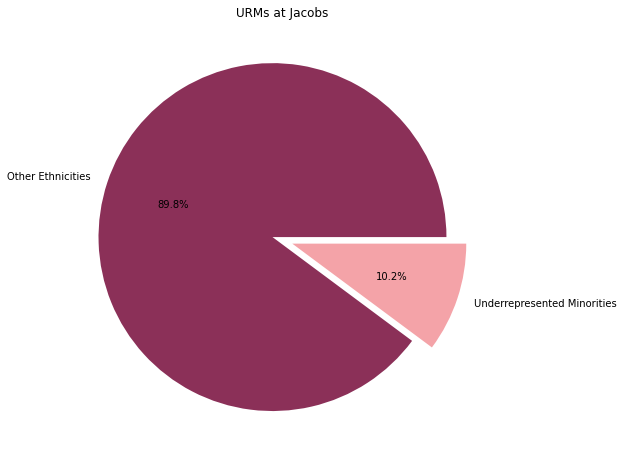

In [42]:
urms_jacobs = pd.DataFrame(index = ['Other Ethnicities', 'Underrepresented Minorities'], data = 
[ethnicities.groupby('Ethnicity').count()[['ppsk']].loc[[True,True,False,True]].sum(),
ethnicities.groupby('Ethnicity').count()[['ppsk']].loc['Underrepresented Minority']])

#blue_gold = [(0.231,0.494,0.631),(0.992,0.709,0.082)]
plt.figure(figsize = (10,8))
plt.pie(urms_jacobs, labels = urms_jacobs.index, autopct="%.1f%%", explode=[0.06]*2, pctdistance=0.6, colors=jacobs_two)
plt.title("URMs at Jacobs")

In [43]:
urms_jacobs

,ppsk
Other Ethnicities,4891
Underrepresented Minorities,554


In [44]:
urms_jacobs.sum() # 380 students missing!

ppsk    5445
dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


[None]

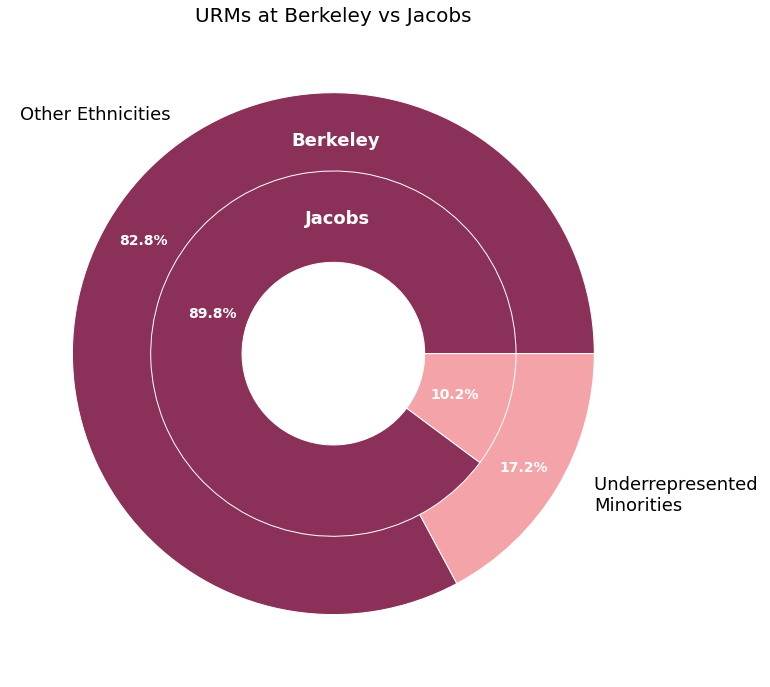

In [86]:
fig, ax = plt.subplots(figsize=(16,12))
font = {'family': 'sans-serif',
        'color':  'white',
        'weight': 'bold',
        'size': 18
        }
size = 0.3
ax.pie(urms_berk, radius=1, colors=jacobs_two,
       wedgeprops=dict(width=.35, edgecolor='w',antialiased=True), textprops=dict(size=14,color='white', weight='bold'), labels=urms_berk.index, autopct="%.1f%%", pctdistance=0.85, labeldistance=None)
ax.pie(urms_jacobs, radius=1-size, colors=jacobs_two,
       wedgeprops=dict(width=.35, edgecolor='w',antialiased=True),textprops=dict(size=14,color='white',weight='bold'), autopct="%.1f%%", pctdistance=0.7, labeldistance=None)
ax.text(-.11,.5,"Jacobs", fontdict=font)
ax.text(-.16,.8,"Berkeley", fontdict=font)
ax.text(-1.2,.9, "Other Ethnicities",fontdict=dict(size=18))
ax.text(1, -.6,"Underrepresented \nMinorities",fontdict=dict(size=18))
ax.set_title('URMs at Berkeley vs Jacobs',fontsize=20)
ax.set(aspect="equal")

In [46]:
women_jacobs = ethnicities.groupby(['Ethnicity','Gender']).count()[['ppsk']].loc['Underrepresented Minority'].reindex(['Male','Female']).rename(index={'Male':'Men', 'Female':'Women'})['ppsk']

In [47]:
women_jacobs.sum()

554

In [48]:
women_jacobs

Gender
Men      315
Women    239
Name: ppsk, dtype: int64

In [49]:
urms_women

Gender
Men      5915
Women    7854
Name: ppsk, dtype: int64

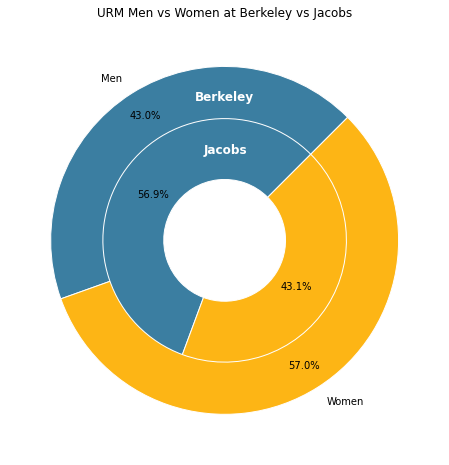

In [50]:
fig, ax = plt.subplots(figsize=(12,8))
font = {'family': 'sans-serif',
        'color':  'white',
        'weight': 'bold',
        'size': 12
        }
size = 0.3
ax.pie(urms_women, radius=1.0, colors=blue_gold,
       wedgeprops=dict(width=.35, edgecolor='w'), labels=urms_women.index, autopct="%.1f%%", pctdistance=.85, startangle=45)

ax.pie(women_jacobs, radius=1-size, colors=blue_gold,
       wedgeprops=dict(width=.35, edgecolor='w'), autopct="%.1f%%", pctdistance=0.7, startangle=45)
'''ax.text(.35,.2,"Jacobs", fontdict=font)
ax.text(.5,.5,"Berkeley", fontdict=font)'''
ax.text(-.12,.5,"Jacobs", fontdict=font)
ax.text(-.17,.8,"Berkeley", fontdict=font)
ax.set(aspect="equal", title='URM Men vs Women at Berkeley vs Jacobs')
plt.show()

In [51]:
jacobs_incomes = cleaned_jacobs[cleaned_jacobs['ppsk'].isin(stem_paths[(~stem_paths['income.parent'].isna()) | (~stem_paths['income.student'].isna())]['ppsk'])].merge(stem_paths[['income.parent','income.student','ppsk']], on='ppsk').drop_duplicates(subset=['ppsk']).fillna(0)
jacobs_incomes

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,income.parent,income.student
0,781707,2015,Fall,N,N,Y,18000.0,0.0
2,895798,2015,Fall,N,N,Y,0.0,22000.0
7,857674,2015,Fall,N,N,Y,150000.0,0.0
8,856881,2015,Fall,N,Y,Y,180000.0,0.0
9,946962,2015,Fall,N,Y,Y,97436.0,0.0
...,...,...,...,...,...,...,...,...
7927,2734942,2020,Fall,N,N,Y,160000.0,0.0
7928,2736241,2020,Fall,N,Y,N,75000.0,0.0
7929,2738497,2020,Fall,N,Y,N,750000.0,0.0
7930,2743294,2020,Fall,N,Y,N,15000.0,0.0


## Variable 'ethnicities' created by merging cleaned Jacobs data with gender and ethnicity from 'stem_paths'

Text(0.5, 0, 'Number of Students; n = 183')

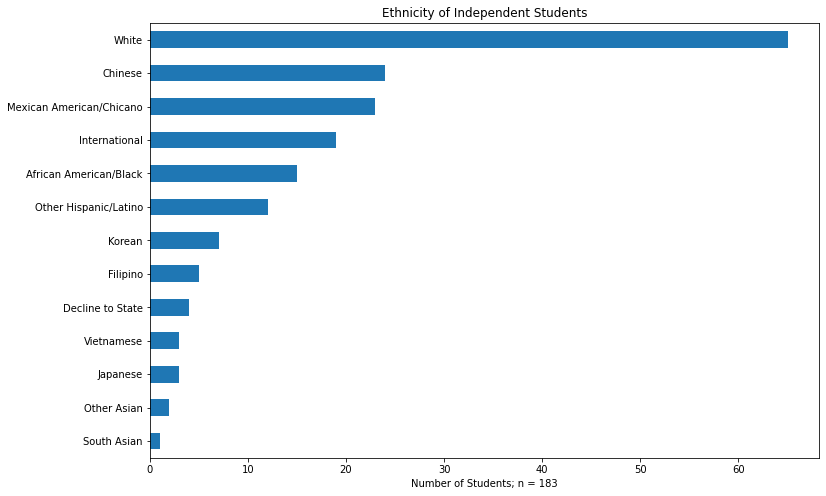

In [52]:
jacobs_incomes = ethnicities[ethnicities['ppsk'].isin(stem_paths[(~stem_paths['income.parent'].isna()) | (~stem_paths['income.student'].isna())]['ppsk'])].merge(stem_paths[['income.parent','income.student','ethnic.l3','ppsk']], on='ppsk').drop_duplicates(subset=['ppsk']).fillna(0)#.merge(student_majors[['ppsk', 'college']], on='ppsk').drop_duplicates()
jacobs_incomes[jacobs_incomes['income.student'] != 0].groupby('ethnic.l3').count()['ppsk'].sort_values().plot(kind='barh', figsize=(12,8), xlabel="", title= "Ethnicity of Independent Students").set_xlabel("Number of Students; n = 183")

In [53]:
indep_jacobs = jacobs_incomes[jacobs_incomes['income.student'] != 0]

In [54]:
incomes_berkeley = student_courses[(~student_courses['ppsk'].isin(indep_jacobs)) & (student_courses['undergrad.status'] == 'Undergraduate')].drop_duplicates(subset='ppsk')
incomes_berkeley = incomes_berkeley.merge(stem_paths[['income.parent','income.student','ethnic.l1','ppsk']], on='ppsk').drop_duplicates(subset='ppsk')
incomes_berkeley[['income.parent','income.student']] = incomes_berkeley[['income.parent','income.student']].fillna(0)
incomes_berkeley['Income'] = incomes_berkeley['income.parent'] + incomes_berkeley['income.student']

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [55]:
incomes_berkeley

,year.name,ppsk,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,instructor.name,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours,income.parent,income.student,ethnic.l1,Income
0,2007 Summer,680817,Undergraduate,Music,Music,26AC,Primary,2,64620,64620.0,American Culture,Bonnie Wade; Rebecca Bodenheimer; Shalini Ayya...,A,Letter Grade,A+,4.0,4.0,500000.0,0.0,White/Other,500000.0
1,2007 Summer,692430,Undergraduate,Psychology,Psychology,160,Primary,1,75390,75390.0,Social Psychology,Sara Gorchoff; Stephen Hinshaw,A,Letter Grade,A+,4.0,3.0,33000.0,0.0,Asian/Pacific Islander,33000.0
2,2007 Summer,728540,Undergraduate,Ethnic Studies,Ethnic Studies,122AC,Primary,1,45230,45230.0,Eth/Race In Am Film,Diane Pearson,A,Letter Grade,A+,4.0,4.0,0.0,33000.0,White/Other,33000.0
3,2007 Summer,731964,Undergraduate,Electrical Eng & Computer Sci,Electrical Engineering,100,Primary,1,37285,200007.0,Elec Tech For Eng,Bharathwaj Muthuswamy; Jean Walrand,A,Letter Grade,A+,4.0,4.0,0.0,0.0,White/Other,0.0
4,2007 Summer,732318,Undergraduate,Business,Business Admin-Undergrad,103,Primary,1,20180,20180.0,Intro To Finance,Avinash Verma,A,Letter Grade,A+,4.0,4.0,100000.0,0.0,International,100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80304,2018 Fall,2423817,Undergraduate,Anthropology,Anthropology,107,Primary,1,20477,20477.0,Evol Hum Brain,NaN,C,Letter Grade,C,2.0,4.0,22454.0,0.0,White/Other,22454.0
80305,2018 Fall,2632260,Undergraduate,Education,Education,140AC,Primary,3,28512,28512.0,Art Of Making Mean,NaN,A,Letter Grade,A,4.0,4.0,600000.0,0.0,White/Other,600000.0
80306,2018 Fall,2763201,Undergraduate,English,English,45A,Primary,1,21275,21275.0,Lit In English,NaN,A,Letter Grade,A-,3.7,4.0,35000.0,0.0,Asian/Pacific Islander,35000.0
80307,2019 Fall,2428229,Undergraduate,East Asian Lang & Culture,Japanese,1A,Primary,2,22247,22247.0,Elementary Japanese,NaN,A,Letter Grade,A,4.0,5.0,10000.0,0.0,Underrepresented Minority,10000.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


Text(0.5, 1.0, 'Proportion of Independent Students at Berkeley; n = 183')

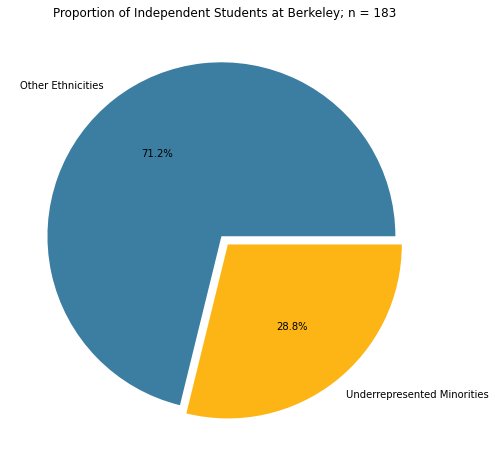

In [56]:
indep_students_berkeley = pd.DataFrame(index = ['Other Ethnicities', 'Underrepresented Minorities'], data = 
[incomes_berkeley[incomes_berkeley['income.student'] != 0].groupby('ethnic.l1').count()[['ppsk']].loc[[True,True,False,True]].sum(),
incomes_berkeley[incomes_berkeley['income.student'] != 0].groupby('ethnic.l1').count()[['ppsk']].loc['Underrepresented Minority']])

blue_gold = [(0.231,0.494,0.631),(0.992,0.709,0.082)]
plt.figure(figsize = (12,8))
plt.pie(indep_students_berkeley, labels = indep_students_berkeley.index, autopct="%.1f%%", explode=[0.03]*2, pctdistance=0.6, colors=blue_gold)
plt.title("Proportion of Independent Students at Berkeley; n = 183")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


Text(0.5, 1.0, 'Proportion of Independent Students at Jacobs; n = 183')

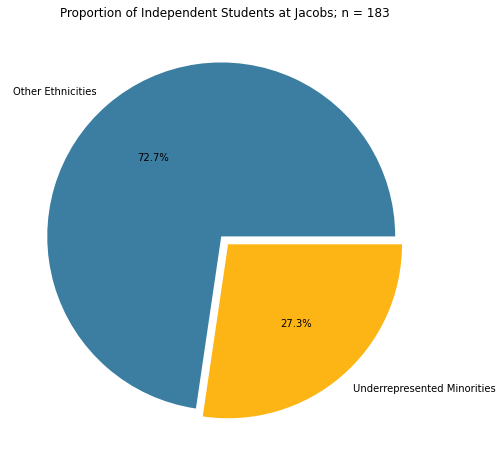

In [57]:
indep_students = pd.DataFrame(index = ['Other Ethnicities', 'Underrepresented Minorities'], data = 
[jacobs_incomes[jacobs_incomes['income.student'] != 0].groupby('Ethnicity').count()[['ppsk']].loc[[True,True,False,True]].sum(),
jacobs_incomes[jacobs_incomes['income.student'] != 0].groupby('Ethnicity').count()[['ppsk']].loc['Underrepresented Minority']])

plt.figure(figsize = (12,8))
plt.pie(indep_students, labels = indep_students.index, autopct="%.1f%%", explode=[0.03]*2, pctdistance=0.6, colors=blue_gold)
plt.title("Proportion of Independent Students at Jacobs; n = 183")

In [58]:
waivers = waivers.loc[waivers['ppsk'] != 'MISSING']
waivers['ppsk'] = waivers.loc[:,'ppsk'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
jacobs_incomes[(jacobs_incomes['Ethnicity'] == 'Underrepresented Minority') & (jacobs_incomes['income.student'] != 0)]#.groupby('income.student').agg()

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,Ethnicity,Gender,income.parent,income.student,ethnic.l3
42,1313676,2015,Fall,N,Y,N,Underrepresented Minority,Male,0.0,12000.0,Mexican American/Chicano
292,1309075,2015,Fall,N,N,Y,Underrepresented Minority,Male,0.0,20000.0,African American/Black
300,1318356,2015,Fall,N,Y,Y,Underrepresented Minority,Male,0.0,5000.0,African American/Black
577,2425148,2015,Fall,N,Y,N,Underrepresented Minority,Male,0.0,27000.0,African American/Black
1018,1486891,2016,Spring,N,Y,N,Underrepresented Minority,Female,0.0,7200.0,African American/Black
1029,1487348,2016,Spring,N,Y,N,Underrepresented Minority,Male,0.0,4000.0,Mexican American/Chicano
1034,2424278,2016,Spring,N,Y,Y,Underrepresented Minority,Male,0.0,9000.0,Mexican American/Chicano
1174,2427246,2016,Spring,N,Y,Y,Underrepresented Minority,Male,0.0,12687.0,Other Hispanic/Latino
1200,2428250,2016,Spring,Y,Y,N,Underrepresented Minority,Female,0.0,16000.0,Other Hispanic/Latino
1217,2636386,2016,Spring,Y,Y,N,Underrepresented Minority,Male,0.0,10695.0,African American/Black


In [60]:
urm_jacobs_incomes = jacobs_incomes[jacobs_incomes['Ethnicity'] == 'Underrepresented Minority'].merge(student_majors[['college','ppsk']], on='ppsk',how='left').drop_duplicates()
filler = urm_jacobs_incomes[urm_jacobs_incomes['college'].isna()].merge(stem_paths[['major.intended.college','ppsk']], on ='ppsk')
test =urm_jacobs_incomes.merge(filler[['ppsk','major.intended.college']], on='ppsk', how='left')

test['college'].fillna(value = test['major.intended.college'],inplace = True)

In [61]:
test

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,Ethnicity,Gender,income.parent,income.student,ethnic.l3,college,major.intended.college
0,1029831,2015,Fall,N,Y,N,Underrepresented Minority,Female,100000.0,0.0,Mexican American/Chicano,Clg of Letters & Science,Clg of Letters & Science
1,1033557,2015,Fall,N,Y,N,Underrepresented Minority,Male,20276.0,0.0,Mexican American/Chicano,Clg of Natural Resources,Clg of Natural Resources
2,1313676,2015,Fall,N,Y,N,Underrepresented Minority,Male,0.0,12000.0,Mexican American/Chicano,Clg of Engineering,Clg of Engineering
3,1487078,2015,Fall,N,Y,N,Underrepresented Minority,Male,100000.0,0.0,African American/Black,Clg of Letters & Science,Clg of Letters & Science
4,1306876,2015,Fall,N,Y,N,Underrepresented Minority,Male,400000.0,0.0,Mexican American/Chicano,Clg of Letters & Science,Clg of Letters & Science
...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,2741723,2020,Spring,Y,Y,N,Underrepresented Minority,Male,16000.0,0.0,African American/Black,Clg of Letters & Science,NaN
533,2744968,2020,Spring,N,N,Y,Underrepresented Minority,Female,30000.0,0.0,Mexican American/Chicano,Clg of Letters & Science,NaN
534,2772410,2020,Spring,N,N,Y,Underrepresented Minority,Male,11448.0,0.0,African American/Black,Clg of Letters & Science,NaN
535,1482699,2020,Fall,N,Y,N,Underrepresented Minority,Male,72000.0,0.0,Native American/Alaska Native,Clg of Letters & Science,Clg of Letters & Science


In [62]:
temporary = ethnicities.merge(student_majors[['college','ppsk']], on ='ppsk', how='left').drop_duplicates()
new_filler = temporary[temporary['college'].isna()].merge(stem_paths[['major.intended.college','ppsk']], on ='ppsk')
new_test = temporary.merge(new_filler[['ppsk','major.intended.college']], on='ppsk', how='left')

new_test['college'].fillna(value = new_test['major.intended.college'],inplace = True)

In [63]:
full_graph = new_test[new_test['Ethnicity'] == 'Underrepresented Minority'].groupby('college').count()['ppsk']
full_graph

college
Clg of Chemistry                10
Clg of Engineering             169
Clg of Environmental Design     52
Clg of Letters & Science       301
Clg of Natural Resources        25
Haas School of Business         12
Name: ppsk, dtype: int64

In [64]:
len(test[test['income.student'] != 0])

50

In [65]:
temporary = ethnicities.merge(student_majors[['college','ppsk']], on ='ppsk', how='left').drop_duplicates()
temporary

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,Ethnicity,Gender,college
0,781707,2015,Fall,N,N,Y,Asian/Pacific Islander,Male,NaN
1,895798,2015,Fall,N,N,Y,White/Other,Male,NaN
2,857674,2015,Fall,N,N,Y,Asian/Pacific Islander,Female,NaN
3,856881,2015,Fall,N,Y,Y,International,Male,NaN
4,946962,2015,Fall,N,Y,Y,White/Other,Male,NaN
...,...,...,...,...,...,...,...,...,...
13297,2734942,2020,Fall,N,N,Y,White/Other,Female,Clg of Letters & Science
13302,2736241,2020,Fall,N,Y,N,Underrepresented Minority,Female,Clg of Letters & Science
13307,2738497,2020,Fall,N,Y,N,International,Male,Clg of Letters & Science
13315,2743294,2020,Fall,N,Y,N,Asian/Pacific Islander,Male,Clg of Letters & Science


In [66]:
graphing_more = test[test['income.student'] != 0].groupby('college').count()['ppsk']

Text(0.5, 1.0, 'Colleges of Independent URM Students at Jacobs; n = 50')

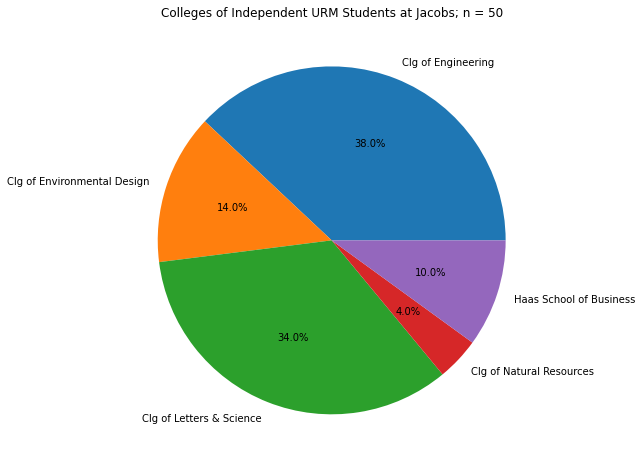

In [67]:
plt.figure(figsize = (12,8))
plt.pie(graphing_more, labels = graphing_more.index, autopct="%.1f%%", explode=[0.00]*5, pctdistance=0.6)
plt.title("Colleges of Independent URM Students at Jacobs; n = 50")

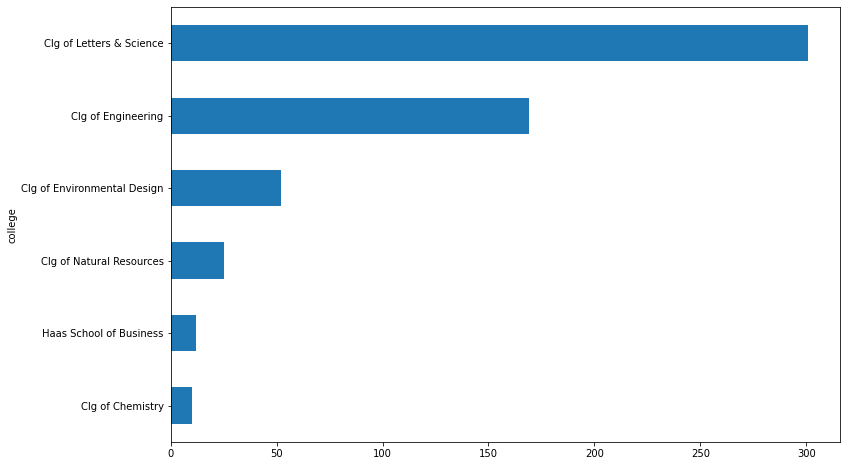

In [68]:
full_graph.sort_values().plot(kind='barh',figsize=(12,8))

Text(0.5, 1.0, 'Colleges of URM Students in Jacobs; n = 569')

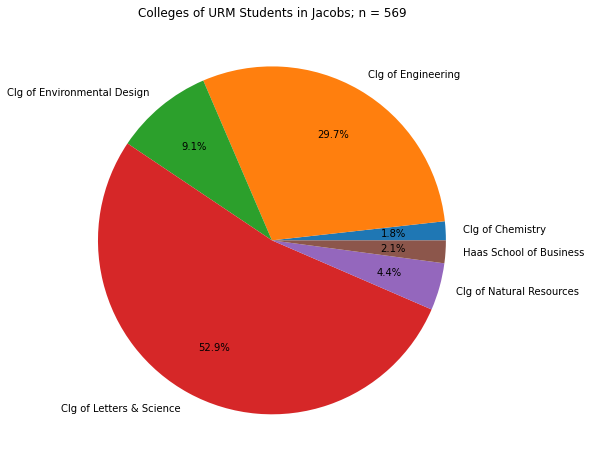

In [69]:
plt.figure(figsize = (12,8))
plt.pie(full_graph, labels = full_graph.index, autopct="%.1f%%", explode=[0.00]*6, pctdistance=0.7)
plt.title("Colleges of URM Students in Jacobs; n = 569")

Text(0.5, 0, 'Number of Students; n = 50')

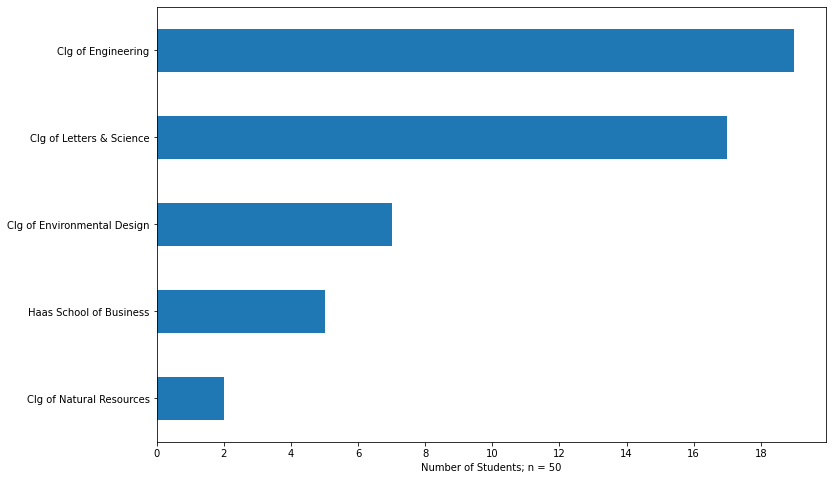

In [70]:
test[test['income.student'] != 0].groupby('college').count()['ppsk'].sort_values().plot(kind='barh',figsize=(12,8), xticks=range(0,20,2), xlabel="", title="").set_xlabel("Number of Students; n = 50")

# New Income Graphing

In [80]:
jacobs_incomes['Income'] = jacobs_incomes['income.parent'] + jacobs_incomes['income.student']

In [79]:
berkeley_incomes = incomes_berkeley[:]
top_majors = ['L&S Computer Science', 'Mechanical Engineering', 'Electrical Eng & Comp Sci', 'Cognitive Science', 'Letters & Sci Undeclared', 'Architecture']
majors = student_majors.groupby('ppsk').last().reset_index()

In [81]:
jacobs_incomes

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,Ethnicity,Gender,income.parent,income.student,ethnic.l3,Income
0,781707,2015,Fall,N,N,Y,Asian/Pacific Islander,Male,18000.0,0.0,Filipino,18000.0
1,895798,2015,Fall,N,N,Y,White/Other,Male,0.0,22000.0,Decline to State,22000.0
2,857674,2015,Fall,N,N,Y,Asian/Pacific Islander,Female,150000.0,0.0,Chinese,150000.0
3,856881,2015,Fall,N,Y,Y,International,Male,180000.0,0.0,International,180000.0
4,946962,2015,Fall,N,Y,Y,White/Other,Male,97436.0,0.0,Decline to State,97436.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4767,2734942,2020,Fall,N,N,Y,White/Other,Female,160000.0,0.0,White,160000.0
4768,2736241,2020,Fall,N,Y,N,Underrepresented Minority,Female,75000.0,0.0,African American/Black,75000.0
4769,2738497,2020,Fall,N,Y,N,International,Male,750000.0,0.0,International,750000.0
4770,2743294,2020,Fall,N,Y,N,Asian/Pacific Islander,Male,15000.0,0.0,Chinese,15000.0


In [78]:
berkeley_incomes

,year.name,ppsk,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,instructor.name,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours,income.parent,income.student,ethnic.l1,Income
0,2007 Summer,680817,Undergraduate,Music,Music,26AC,Primary,2,64620,64620.0,American Culture,Bonnie Wade; Rebecca Bodenheimer; Shalini Ayya...,A,Letter Grade,A+,4.0,4.0,500000.0,0.0,White/Other,500000.0
1,2007 Summer,692430,Undergraduate,Psychology,Psychology,160,Primary,1,75390,75390.0,Social Psychology,Sara Gorchoff; Stephen Hinshaw,A,Letter Grade,A+,4.0,3.0,33000.0,0.0,Asian/Pacific Islander,33000.0
2,2007 Summer,728540,Undergraduate,Ethnic Studies,Ethnic Studies,122AC,Primary,1,45230,45230.0,Eth/Race In Am Film,Diane Pearson,A,Letter Grade,A+,4.0,4.0,0.0,33000.0,White/Other,33000.0
3,2007 Summer,731964,Undergraduate,Electrical Eng & Computer Sci,Electrical Engineering,100,Primary,1,37285,200007.0,Elec Tech For Eng,Bharathwaj Muthuswamy; Jean Walrand,A,Letter Grade,A+,4.0,4.0,0.0,0.0,White/Other,0.0
4,2007 Summer,732318,Undergraduate,Business,Business Admin-Undergrad,103,Primary,1,20180,20180.0,Intro To Finance,Avinash Verma,A,Letter Grade,A+,4.0,4.0,100000.0,0.0,International,100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80304,2018 Fall,2423817,Undergraduate,Anthropology,Anthropology,107,Primary,1,20477,20477.0,Evol Hum Brain,NaN,C,Letter Grade,C,2.0,4.0,22454.0,0.0,White/Other,22454.0
80305,2018 Fall,2632260,Undergraduate,Education,Education,140AC,Primary,3,28512,28512.0,Art Of Making Mean,NaN,A,Letter Grade,A,4.0,4.0,600000.0,0.0,White/Other,600000.0
80306,2018 Fall,2763201,Undergraduate,English,English,45A,Primary,1,21275,21275.0,Lit In English,NaN,A,Letter Grade,A-,3.7,4.0,35000.0,0.0,Asian/Pacific Islander,35000.0
80307,2019 Fall,2428229,Undergraduate,East Asian Lang & Culture,Japanese,1A,Primary,2,22247,22247.0,Elementary Japanese,NaN,A,Letter Grade,A,4.0,5.0,10000.0,0.0,Underrepresented Minority,10000.0


In [92]:
jacobs_incomes

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,Ethnicity,Gender,income.parent,income.student,ethnic.l3,Income
0,781707,2015,Fall,N,N,Y,Asian/Pacific Islander,Male,18000.0,0.0,Filipino,18000.0
1,895798,2015,Fall,N,N,Y,White/Other,Male,0.0,22000.0,Decline to State,22000.0
2,857674,2015,Fall,N,N,Y,Asian/Pacific Islander,Female,150000.0,0.0,Chinese,150000.0
3,856881,2015,Fall,N,Y,Y,International,Male,180000.0,0.0,International,180000.0
4,946962,2015,Fall,N,Y,Y,White/Other,Male,97436.0,0.0,Decline to State,97436.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4767,2734942,2020,Fall,N,N,Y,White/Other,Female,160000.0,0.0,White,160000.0
4768,2736241,2020,Fall,N,Y,N,Underrepresented Minority,Female,75000.0,0.0,African American/Black,75000.0
4769,2738497,2020,Fall,N,Y,N,International,Male,750000.0,0.0,International,750000.0
4770,2743294,2020,Fall,N,Y,N,Asian/Pacific Islander,Male,15000.0,0.0,Chinese,15000.0


In [97]:
cleaned_bcdi = bcdi[bcdi['ppsk'] != 'MISSING']
cleaned_bcdi.dropna(inplace=True)
cleaned_bcdi['ppsk'] = cleaned_bcdi['ppsk'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [139]:
jacobs_incomes[jacobs_incomes['Ethnicity'] == 'Underrepresented Minority'].append(berkeley_incomes[berkeley_incomes['ethnic.l1'] == 'Underrepresented Minority']).drop_duplicates(subset='ppsk')['Income'].mean()

59415.995281649244

In [ ]:
urm_income = 

In [166]:
incomes_by_group = pd.DataFrame(index = ['Maker Pass Waivers', 'Underrepresented \nMinorities \n(Berkeley)', 'Underrepresented \nMinorities \n(Jacobs)', 'Jacobs Students', 'BCDI Students', 'Berkeley Students'], data = [
    # mp waivers
    jacobs_incomes[['ppsk','Income']].merge(waivers,on='ppsk').drop_duplicates(subset='ppsk', keep='last')['Income'].median(),
    # urms berk
    berkeley_incomes[berkeley_incomes['ethnic.l1'] == 'Underrepresented Minority'].drop_duplicates(subset='ppsk')['Income'].median(),
    # urms jacobs
    jacobs_incomes[jacobs_incomes['Ethnicity'] == 'Underrepresented Minority']['Income'].mean(),
    # jacobs
    jacobs_incomes['Income'].median(),
    # bcdi
    jacobs_incomes[['ppsk','Income']].merge(cleaned_bcdi,on='ppsk').drop_duplicates(subset='ppsk', keep='last')['Income'].median(),
    #berkeley
    berkeley_incomes['Income'].median()
])

In [118]:
import matplotlib.ticker as ticker

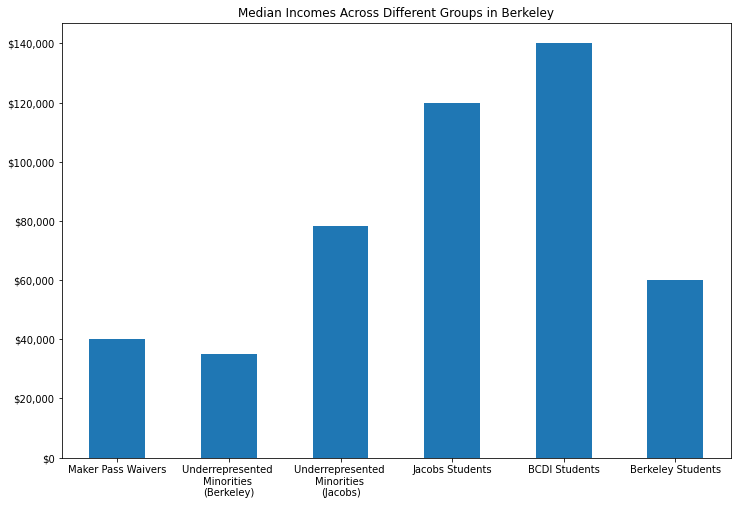

In [168]:
fig = incomes_by_group.plot(kind='bar',rot=0, figsize=(12,8), legend=False)
fig.set_title("Median Incomes Across Different Groups in Berkeley")



# thank you stack overflow
fig.get_yaxis().set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

In [114]:
[print(x) for x in fig.get_yticks()]

0.0
20000.0
40000.0
60000.0
80000.0
100000.0
120000.0
140000.0
160000.0
180000.0


[None, None, None, None, None, None, None, None, None, None]

In [169]:
fig.get_yticks()

array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
       140000., 160000.])